In [ ]:
import pandas as pd
import json
import math
import os
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('fivethirtyeight')
DATASET_PATH = "./dataset/"

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
ticker = "فملی"
df = pd.read_csv(DATASET_PATH+ticker+'.csv')
# Change names
df.columns = df.columns.str.capitalize()
df.set_index('Date', inplace=True)   # Set Jdate as Index
df.index = pd.to_datetime(df.index)

In [4]:
df.head()

,Open,High,Low,Adjclose,Value,Volume,Count,Yesterday,Close,Jdate,Rsi,Ema20,Ema100,Ema150
Date,,,,,,,,,,,,,,
2007-10-29,8252.0,8469.0,8252.0,8266.0,50789716124,6143965,780,8420.0,8266.0,1386-08-07,47.760399,8654.161149,7109.466829,6025.500000
2007-10-30,8240.0,8431.0,8140.0,8356.0,22491955322,2691694,663,8266.0,8356.0,1386-08-08,50.014531,8625.764849,7134.150655,6056.367550
2007-10-31,8496.0,8499.0,8189.0,8281.0,18966117882,2287460,608,8356.0,8281.0,1386-08-09,48.190485,8592.930102,7156.860543,6085.832880
2007-11-03,8116.0,8208.0,8116.0,8208.0,8329151428,1026263,37,8281.0,8208.0,1386-08-12,46.454656,8556.270092,7177.675185,6113.941054
2007-11-04,8044.0,8066.0,8044.0,8066.0,16119709668,2003942,68,8208.0,8066.0,1386-08-13,43.263767,8509.577702,7195.265776,6139.796139


In [5]:
df.describe()

,Open,High,Low,Adjclose,Value,Volume,Count,Yesterday,Close,Rsi,Ema20,Ema100,Ema150
count,3528.000000,3528.000000,3528.000000,3528.000000,3.528000e+03,3.528000e+03,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,6244.476757,6342.334467,6138.973356,6249.710034,3.759902e+11,3.530731e+07,4435.691893,6236.850057,6242.316893,49.974660,6246.227542,6240.219284,6215.730729
std,5293.579426,5414.704078,5153.110027,5280.615872,1.160664e+12,6.505554e+07,12422.485057,5266.297905,5279.193024,15.190764,5180.239827,4677.909953,4417.228361
min,0.000000,1155.000000,1101.000000,1139.000000,3.656000e+04,1.000000e+01,1.000000,1139.000000,1140.000000,2.308822,1177.788266,1325.781576,1442.467952
25%,2760.500000,2799.000000,2714.250000,2766.500000,6.747333e+09,1.755942e+06,230.000000,2762.000000,2761.250000,40.011382,2805.067161,3054.354432,3105.085777
50%,4950.000000,4998.500000,4890.000000,4918.000000,2.667673e+10,8.015099e+06,641.500000,4911.500000,4944.500000,49.637983,4937.625726,5201.586187,5407.743823
75%,7460.000000,7537.500000,7385.500000,7479.250000,2.403280e+11,4.377639e+07,3180.250000,7476.250000,7473.750000,60.467621,7471.955138,7479.135349,7357.353777
max,37920.000000,39810.000000,36500.000000,37410.000000,1.824282e+13,1.175628e+09,250607.000000,37410.000000,37170.000000,91.182148,33366.242430,26804.667182,23522.588287


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3528 entries, 2007-10-29 to 2023-09-13
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3528 non-null   float64
 1   High       3528 non-null   float64
 2   Low        3528 non-null   float64
 3   Adjclose   3528 non-null   float64
 4   Value      3528 non-null   int64  
 5   Volume     3528 non-null   int64  
 6   Count      3528 non-null   int64  
 7   Yesterday  3528 non-null   float64
 8   Close      3528 non-null   float64
 9   Jdate      3528 non-null   object 
 10  Rsi        3528 non-null   float64
 11  Ema20      3528 non-null   float64
 12  Ema100     3528 non-null   float64
 13  Ema150     3528 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 413.4+ KB


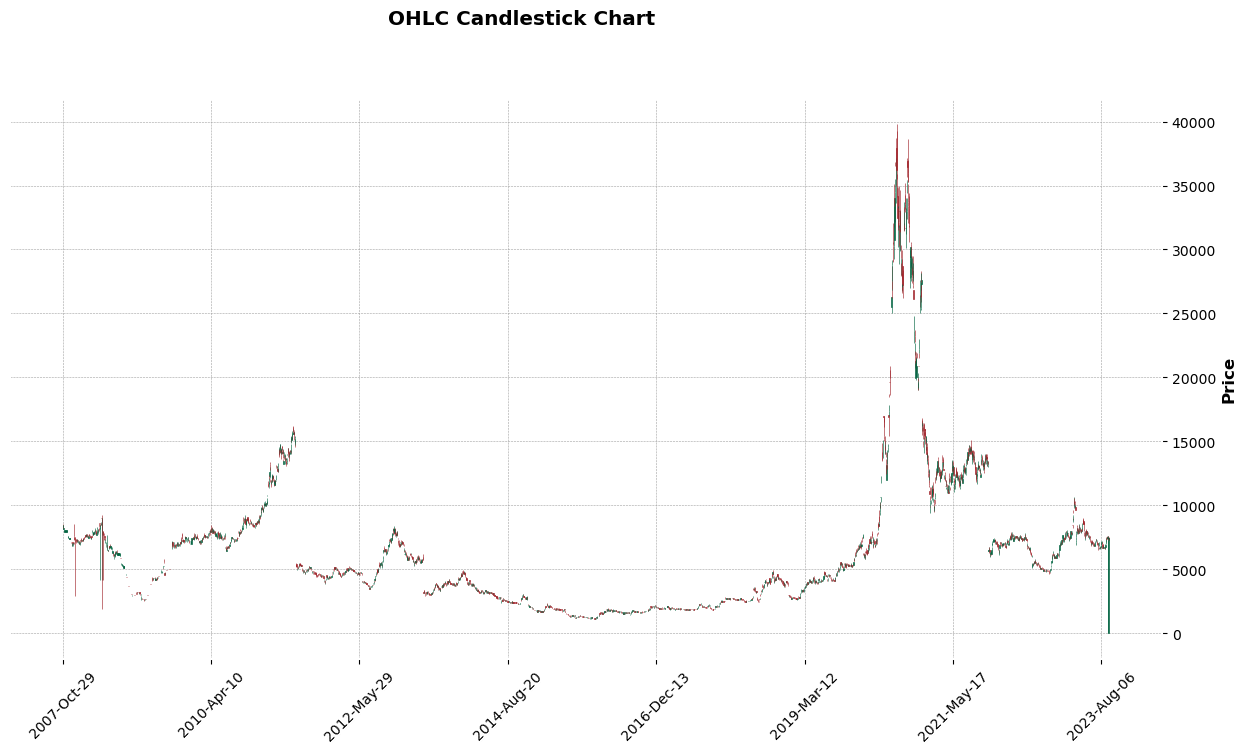

In [7]:
# Plot the candlesticks
add_plots = [
#     mpf.make_addplot(df['Close'].to_numpy(), color='orange', width=2)
]
mpf.plot(
    df, type='candle', style='charles', title='OHLC Candlestick Chart',
    warn_too_much_data=10000, figsize=(16, 8), addplot=add_plots
)

# Get the number of rows

In [8]:
df.shape

(3528, 14)

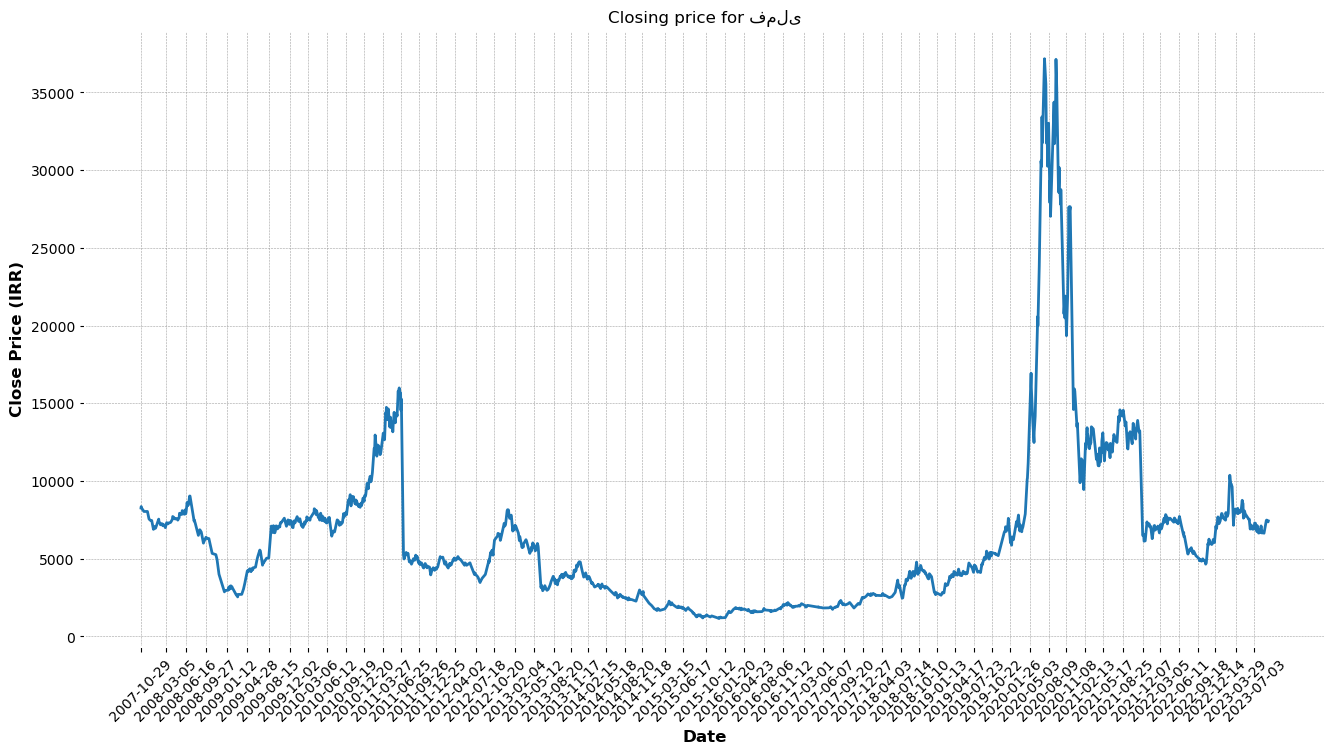

In [9]:
# closing price
plt.figure(figsize=(16, 8))
plt.title(f"Closing price for {ticker}")
plt.plot(df['Close'])
plt.xticks(df.index[::60], rotation=45)
plt.xlabel("Date")
plt.ylabel("Close Price (IRR)")
plt.show()

In [10]:
# Create new df with only colse price
training_columns = ["Close", "Rsi", "Ema20", "Ema100", "Ema150", "Volume"]
data = df.filter(training_columns)

# conver to numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
data.shape

(3528, 6)

## Feature Scaling with MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.19777963, 0.51141979, 0.23226878, 0.22699915, 0.20756373,
        0.00522611],
       [0.20027755, 0.5367832 , 0.23138659, 0.22796794, 0.20896171,
        0.00228957],
       [0.19819595, 0.51625909, 0.23036651, 0.22885926, 0.21029618,
        0.00194573],
       ...,
       [0.1737441 , 0.63883851, 0.18732667, 0.23168603, 0.26304319,
        0.057555  ],
       [0.17291146, 0.62578304, 0.18780734, 0.2317957 , 0.26311488,
        0.03084187],
       [0.17457674, 0.64457895, 0.18841976, 0.23194984, 0.26322161,
        0.03762748]])

## Create The Training Dataset

## Create The Testing Dataset

## Build The LSTM Model 1

## Build The LSTM Model 2

### Compile The Model

### Train The Model

### Predicted Price & RMSE

In [12]:
BACKTRACK_i = 30
result = {}
for BACKTRACK in range(30, 61):
    # Set random seeds
    np.random.seed(0)
    tf.random.set_seed(0)
    ### Create The Training Dataset ###
    # Create the scaled training dataset
    train_data = scaled_data[0:training_data_len, :]

    # Split the data into x_train and y_train
    x_train = []
    y_train = []

    for i in range(BACKTRACK, len(train_data)):
        x_train.append(train_data[i-BACKTRACK:i, :])
        y_train.append(train_data[i, 0])

    # Conver x_train and y_tarin to numpy
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data (659, 60) to (659, 60, 1)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], len(training_columns)))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))
    ### Create The Testing Dataset ###
    # Create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len-BACKTRACK:, :]
    # Creaet the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, 0]
    for i in range(BACKTRACK, len(test_data)):
        x_test.append(test_data[i-BACKTRACK:i, :])
    # Convert the data to a numpy array and reshape it
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], len(training_columns)))
    y_test = np.array(y_test)
    y_test = np.reshape(y_test, (y_test.shape[0], 1))
    ### MODEL 1 ###
    # input_shape=(x_train.shape[1], len(training_columns))
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], len(training_columns))))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1)) 
    ## Compile The Model ##
    model.compile(optimizer='adam', loss='mean_squared_error')
#     print(model.summary(expand_nested=True,show_trainable=True))
    ## Train The Model ##
    # Train the model with a fixed batch order and controlled randomness
    np.random.seed(0)
    model.fit(x_train, y_train, batch_size=8, epochs=1, verbose=0)
    ## Predicted Price & RMSE ##
    # Get the model predicted price values
    predictions = model.predict(x_test)

    mod_predictions = np.zeros((predictions.shape[0], len(training_columns)))
    mod_predictions[:, 0] = predictions[:, 0]

    predictions = scaler.inverse_transform(mod_predictions)

    # Get root mean squared error (RMSE)
    rmse = np.sqrt( np.mean( predictions[:, 0] - y_test )**2 )
    rmse = np.ceil(rmse)
    print((BACKTRACK, rmse))
    result[rmse] = BACKTRACK

23/23 [==============================] - 0s 3ms/step
(30, 57.0)
23/23 [==============================] - 0s 3ms/step
(31, 469.0)
23/23 [==============================] - 0s 3ms/step
(32, 198.0)
23/23 [==============================] - 0s 3ms/step
(33, 1.0)
23/23 [==============================] - 0s 3ms/step
(34, 1313.0)
23/23 [==============================] - 0s 3ms/step
(35, 894.0)
23/23 [==============================] - 0s 5ms/step
(36, 1713.0)
23/23 [==============================] - 0s 4ms/step
(37, 1544.0)
23/23 [==============================] - 0s 4ms/step
(38, 160.0)
23/23 [==============================] - 0s 4ms/step
(39, 126.0)
23/23 [==============================] - 1s 4ms/step
(40, 490.0)
23/23 [==============================] - 0s 4ms/step
(41, 228.0)
23/23 [==============================] - 1s 4ms/step
(42, 900.0)
23/23 [==============================] - 0s 4ms/step
(43, 780.0)
23/23 [==============================] - 0s 4ms/step
(44, 468.0)
23/23 [==================

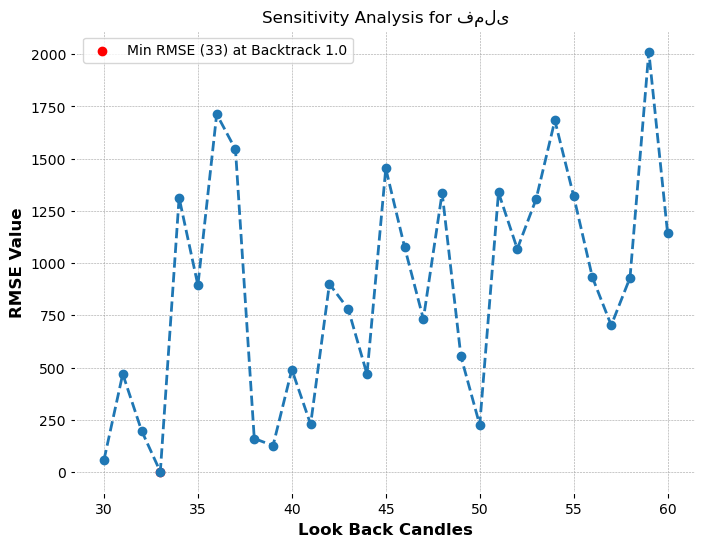

In [13]:
min_y = min(result)
min_x = result.get(min_y)
plt.figure(figsize=(8, 6))
plt.scatter(min_x, min_y, color='red', marker='o', label=f'Min RMSE ({min_x}) at Backtrack {min_y}')
plt.plot(result.values(), result.keys(), marker='o', linestyle='--')
plt.title(f"Sensitivity Analysis for {ticker}")
plt.xlabel("Look Back Candles")
plt.ylabel("RMSE Value")
plt.legend()
plt.show()